# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [43]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [44]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


In [45]:
df.columns

Index(['Unnamed: 0', 'id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_p

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

Correspondingly, we calculate the price differences from the data of the peak and mid peak periods.

In [46]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [47]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean', 'price_peak_var': 'mean', 'price_peak_fix': 'mean',
'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

first_6_mean_prices = monthly_price_by_id[monthly_price_by_id['price_date'] < '2015-06-30'].groupby(['id']).mean().reset_index()
last_6_mean_prices = monthly_price_by_id[monthly_price_by_id['price_date'] > '2015-06-30'].groupby(['id']).mean().reset_index()

# Calculate the difference
diff = pd.merge(last_6_mean_prices.rename(columns={
    'price_off_peak_var': 'dec_1_off_peak', 'price_off_peak_fix': 'dec_2_off_peak', 
    'price_peak_var': 'dec_1_peak', 'price_peak_fix': 'dec_2_peak',
    'price_mid_peak_var': 'dec_1_mid_peak', 'price_mid_peak_fix': 'dec_2_mid_peak'}), 
                first_6_mean_prices, on='id')
diff['offpeak_diff_energy'] = diff['dec_1_off_peak'] - diff['price_off_peak_var']
diff['offpeak_diff_power'] = diff['dec_2_off_peak'] - diff['price_off_peak_fix']
diff['peak_diff_energy'] = diff['dec_1_peak'] - diff['price_peak_var']
diff['peak_diff_power'] = diff['dec_2_peak'] - diff['price_peak_fix']
diff['midpeak_diff_energy'] = diff['dec_1_mid_peak'] - diff['price_mid_peak_var']
diff['midpeak_diff_power'] = diff['dec_2_mid_peak'] - diff['price_mid_peak_fix']

diffe = diff[['id', 'offpeak_diff_energy','offpeak_diff_power', 'peak_diff_energy', 'peak_diff_power', 'midpeak_diff_energy', 'midpeak_diff_power']]
diffe.head()

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1517/479277327.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  first_6_mean_prices = monthly_price_by_id[monthly_price_by_id['price_date'] < '2015-06-30'].groupby(['id']).mean().reset_index()
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1517/479277327.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  last_6_mean_prices = monthly_price_by_id[monthly_price_by_id['price_date'] > '2015-06-30'].groupby(['id']).mean().reset_index()


,id,offpeak_diff_energy,offpeak_diff_power,peak_diff_energy,peak_diff_power,midpeak_diff_energy,midpeak_diff_power
0,0002203ffbb812588b632b9e628cc38d,-0.006144,5.430520e-02,-0.002852,0.032583,0.001135,0.021722
1,0004351ebdd665e6ee664792efc4fd13,-0.003480,1.185192e-01,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.040930,1.250000e+00,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.008658,1.629150e-01,-0.004425,0.097750,0.000772,0.065167
4,00114d74e963e47177db89bc70108537,-0.003484,-8.000000e-07,0.000000,0.000000,0.000000,0.000000


In [48]:
correlation = df.corr()
correlation['churn']

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1517/4281659734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Unnamed: 0                       -0.000426
cons_12m                         -0.045974
cons_gas_12m                     -0.037954
cons_last_month                  -0.045290
forecast_cons_12m                 0.012946
forecast_cons_year               -0.002567
forecast_discount_energy          0.017044
forecast_meter_rent_12m           0.044228
forecast_price_energy_off_peak   -0.010815
forecast_price_energy_peak        0.029332
forecast_price_pow_off_peak       0.014776
imp_cons                         -0.001593
margin_gross_pow_ele              0.095733
margin_net_pow_ele                0.095780
nb_prod_act                      -0.014908
net_margin                        0.041136
num_years_antig                  -0.074172
pow_max                           0.030355
mean_year_price_p1_var           -0.006395
mean_year_price_p2_var            0.029604
mean_year_price_p3_var            0.046528
mean_year_price_p1_fix            0.016807
mean_year_price_p2_fix            0.047224
mean_year_p

In [49]:
df_train = pd.merge(df, diffe, on = 'id')
df_train.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_energy,offpeak_diff_power,peak_diff_energy,peak_diff_power,midpeak_diff_energy,midpeak_diff_power
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,42.629663,12.311304,8.182687,1,-0.002378,0.752587,-0.005291,-3.975137,-0.010011,-2.650089
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,44.592310,0.000000,0.000000,0,-0.003516,0.088889,0.014247,0.000000,0.000000,0.000000
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,44.612508,0.088409,0.000000,0,-0.003885,0.118519,0.000227,0.000000,0.000000,0.000000
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,44.593296,0.000000,0.000000,0,-0.003761,0.088889,0.000000,0.000000,0.000000,0.000000
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,40.848791,24.539003,16.365274,0,-0.005816,0.081458,-0.002541,0.048875,0.001725,0.032583


Now, we have a dataset with all of the features we want.

In [50]:
df_train['year_activ'] = df_train['date_activ'].dt.year
df_train['year_end'] = df_train['date_end'].dt.year
df_train['year_modif_prod'] = df_train['date_modif_prod'].dt.year
df_train['year_renewal'] = df_train['date_renewal'].dt.year
df_train_clean = df_train.drop(columns = ['Unnamed: 0', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'mean_year_price_p2_var',
       'mean_year_price_p3_var',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3',
       'mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix',
       'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3'])
nonnum = [i for i in df_train_clean.columns if df_train_clean[i].dtype not in ['int64', 'float64'] and i != 'id']
traintest_imbalanced = df_train_clean.drop(columns = nonnum)
traintest_imbalanced.head()
traintest_imbalanced.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p1_fix', 'churn', 'offpeak_diff_energy',
       'offpeak_diff_power', 'peak_diff_energy', 'peak_diff_power',
       'midpeak_diff_energy', 'midpeak_diff_power', 'year_activ', 'year_end',
       'year_modif_prod', 'year_renewal'],
      dtype='object')

## Undersample
Since we have a highly imbalanced dataset, it is essential to undersample before applying machine learning algorithms to it. Without undersample, we will have an invalid high score for our model. I will explain this in detail.

In [51]:
churn = traintest_imbalanced.loc[traintest_imbalanced['churn'] == 1]
nochurn = traintest_imbalanced.loc[traintest_imbalanced['churn'] == 0]
churn_num = (traintest_imbalanced['churn'] == 1).sum()
nochurn_shuffle = nochurn.sample(frac=1, random_state = 77)[:churn_num]
traintest_balanced = pd.concat([churn, nochurn_shuffle], axis = 0).sample(frac = 1)
print(churn_num)
print((traintest_balanced['churn'] == 1).sum()/len(traintest_balanced))

1419
0.5


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
XXX = traintest_imbalanced.drop(['id', 'churn', 'mean_year_price_p1_var', 'mean_year_price_p1_fix'], axis = 1)
YYY = traintest_imbalanced['churn']

XXX_train, XXX_test, YYY_train, YYY_test = train_test_split(XXX, YYY, test_size = 0.2, random_state = 7)

df_train = pd.concat([XXX_train, YYY_train], axis = 1)
df_test = pd.concat([XXX_test, YYY_test], axis = 1)
#print(df_train.head())
#print(df_test.head())
print(YYY_train[YYY_train == 1].count()/len(df_train))

0.09637110578568983


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, cross_val_predict, StratifiedKFold

Without undersample, we have acheived a Ramdon Forest Classifier which has both Cross-Validation Score and Accuracy very high. However, this is invalid. Imagine a fixed model which classifies every instance as a nochurn. Because there are only 9.7% churn instances in the dataset, this fixed model will have a cross-validation score of roughly $1-9.7\% = 90.3\%$. Similar for accuracy score. 

In [55]:
RFC = RandomForestClassifier(n_estimators = 100, random_state = 77)
RFC.fit(XXX_train, YYY_train)
cvs = cross_val_score(RFC, XXX_train, YYY_train, cv =7)
training_score = RFC.score(XXX_test, YYY_test)
print(cvs.mean())
print(training_score)

0.9049126090880809
0.905169462512838


In [56]:
X = traintest_balanced.drop(['id', 'churn', 'mean_year_price_p1_var', 'mean_year_price_p1_fix'], axis = 1)
Y = traintest_balanced['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

df_train = pd.concat([X_train, Y_train], axis = 1)
df_test = pd.concat([X_test, Y_test], axis = 1)
#print(df_train.head())
#print(df_test.head())
print(Y_train[Y_train == 1].count()/len(df_train))

0.5008810572687225


Now we perform the Random Forest Classifier to the balanced dataset. We can see that both Cross-Validation Score and accuracy are very low. Notice that a purely random classifier will theoretically acheive 0.5 on both scores. 

In [57]:
RFC = RandomForestClassifier(n_estimators = 100, random_state = 77)
RFC.fit(X_train, Y_train)
cvs = cross_val_score(RFC, X_train, Y_train, cv =7)
training_score = RFC.score(X_test, Y_test)

print(cvs.mean())
print(training_score)

0.6136575769909103
0.6338028169014085


We can do grid search and verify if there is a combination of hyperparameters that can acheive higher score. Unfortunately, the best model obtained still underperform.

In [58]:
parameters_grid = {
    'n_estimators': [60, 100, 140],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4]
}

gs = GridSearchCV(RFC, parameters_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
gs.fit(X_train, Y_train)

best_parameters_RFC = gs.best_params_
best_model_RFC = gs.best_estimator_

print(best_parameters_RFC)
print(best_model_RFC.score(X_test, Y_test))

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.6373239436619719


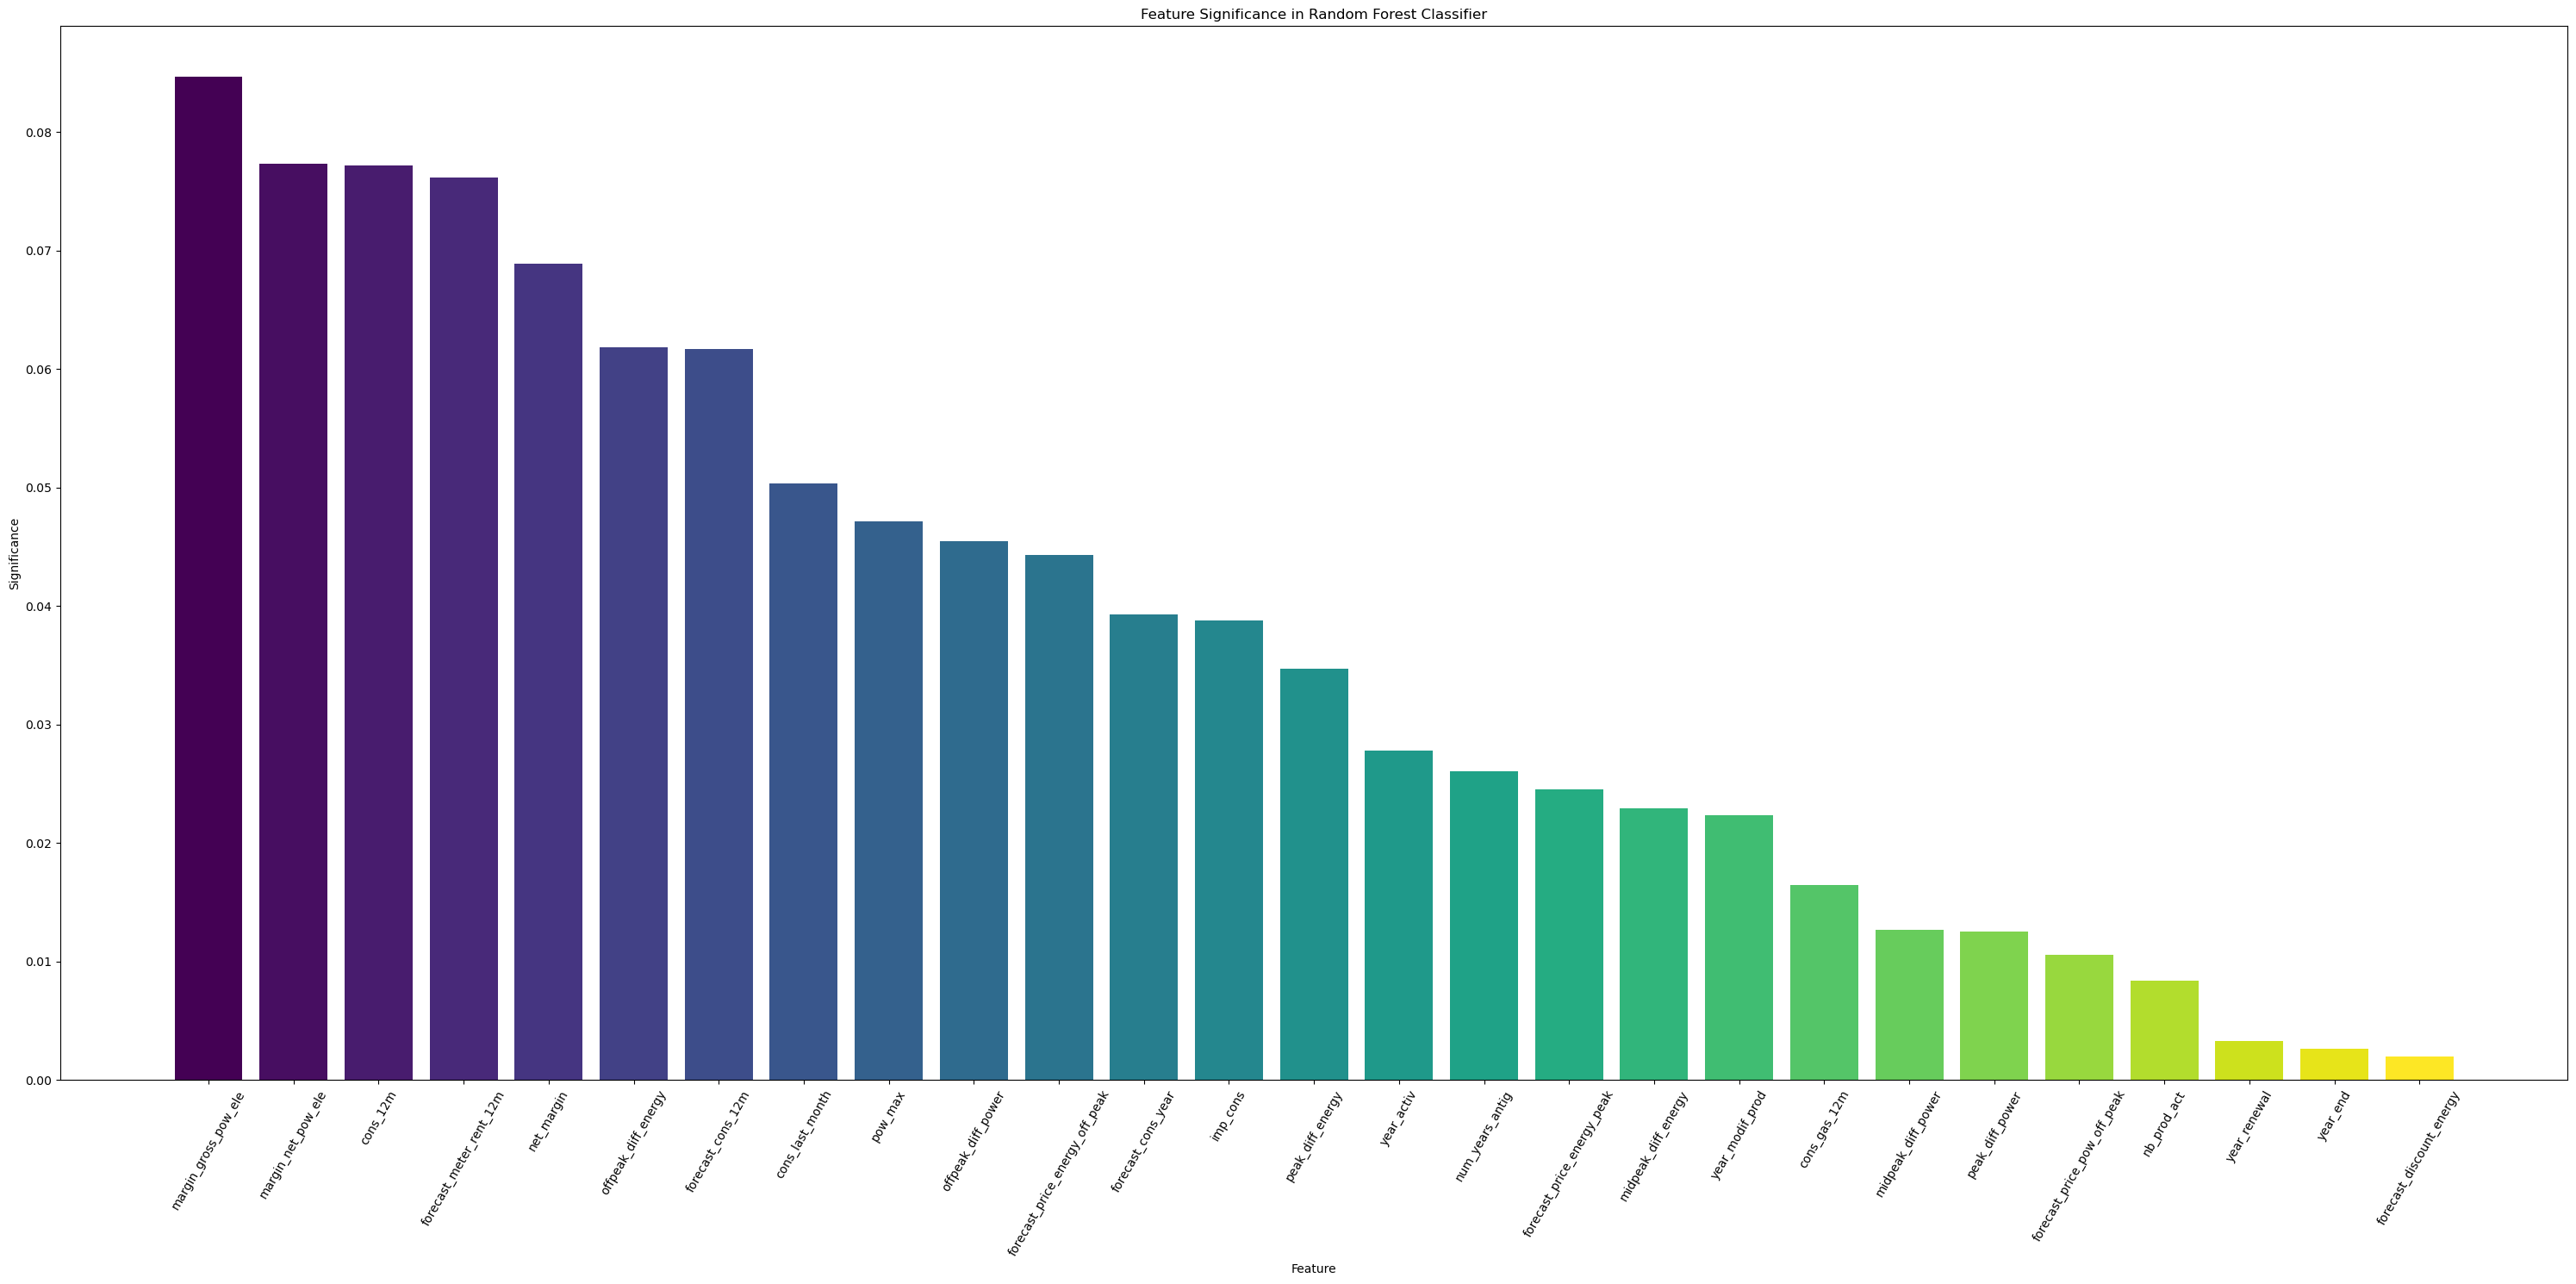

In [59]:
signif = best_model_RFC.feature_importances_
features = X.columns

indices_sorted = np.argsort(signif)[::-1]
signif_sorted = signif[indices_sorted]
features_sorted = [features[i] for i in indices_sorted]
colors = plt.cm.viridis(np.linspace(0, 1, len(features_sorted)))
plt.figure(figsize=(30, 15))
plt.bar(range(len(features_sorted)), signif_sorted, align='center', color = colors)
plt.xticks(range(len(features_sorted)), features_sorted, rotation = 60)
plt.xlabel('Feature')
plt.ylabel('Significance')
plt.title('Feature Significance in Random Forest Classifier')
plt.tight_layout()

# Show the plot
#plt.show()
plt.savefig('Feature Significance.png')

To get more insight of this Random Forest Classifier, we look into the learning curve to see if the datasize is too small. However, the large gap between the training score and the Cross-Validation score indicates that it is likely to be the case of overfitting.

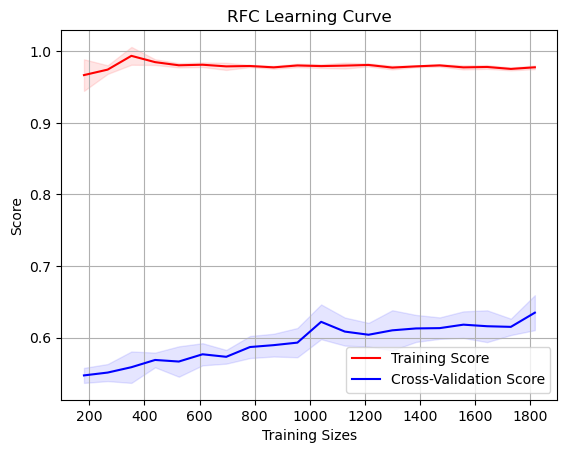

In [60]:
training_sizes = np.linspace(0.1, 1.0, 20)

training_sizes, training_score, test_score = learning_curve(
    best_model_RFC, X_train, Y_train, cv = 5, train_sizes = training_sizes, scoring = 'accuracy'
)

training_score_mean = np.mean(training_score, axis = 1)
training_score_std = np.std(training_score, axis = 1)
test_score_mean = np.mean(test_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

plt.figure()

plt.title('RFC Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.grid()

plt.plot(training_sizes, training_score_mean, color = 'r', label = 'Training Score')
plt.plot(training_sizes, test_score_mean, color = 'b', label = 'Cross-Validation Score')

plt.fill_between(
    training_sizes, training_score_mean - training_score_std, training_score_mean + training_score_std, alpha = 0.1, color = 'r'
)
plt.fill_between(
    training_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha = 0.1, color = 'b'
)


plt.legend()
plt.show()

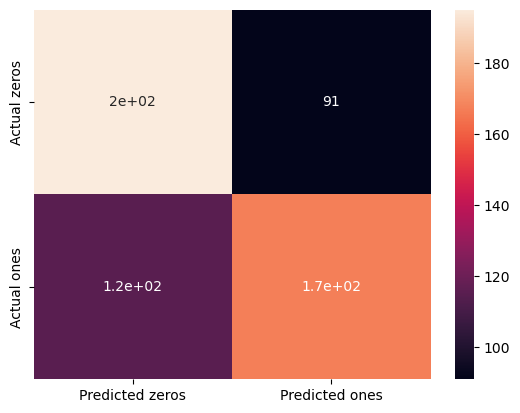

In [61]:
df_confusion_matrix = confusion_matrix(Y_test, best_model_RFC.predict(X_test))

xlabels = ['Predicted zeros', 'Predicted ones']
ylabels = ['Actual zeros', 'Actual ones']
ax = sns.heatmap(df_confusion_matrix, annot = True, xticklabels = xlabels, yticklabels = ylabels)

plt.show()

The ROC curve is just above the 45 degree straight line, which indicates a purely random classifier. This plot visualise how bad this model is in this case.

0.6616962462186224


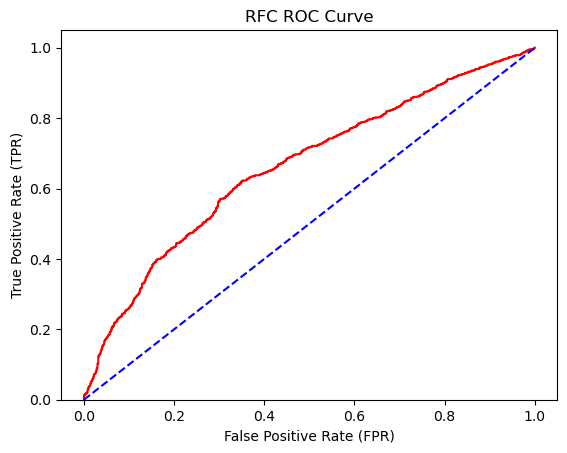

In [62]:
from sklearn.metrics import roc_curve

bestmodel_Y_train_predicted = cross_val_predict(best_model_RFC, X_train, Y_train, cv = 5, method = 'predict_proba')[:, 1]
bestmodel_ras = roc_auc_score(Y_train, bestmodel_Y_train_predicted)
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(Y_train, bestmodel_Y_train_predicted)
print(bestmodel_ras)
plt.figure()
plt.plot(fpr_RFC, tpr_RFC, color = 'r')
plt.plot([0, 1], [0, 1], color = 'b', linestyle = '--')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('RFC ROC Curve')

#plt.show()
plt.savefig('RFC ROC Curve.png')

Similarly, the PR curve also validifies the result on testing the model performance.

0.660623340272076


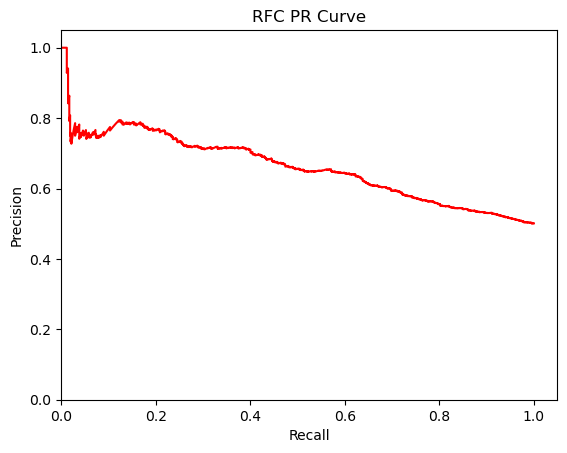

In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prs = average_precision_score(Y_train, bestmodel_Y_train_predicted)

precision, recall, _ = precision_recall_curve(Y_train, bestmodel_Y_train_predicted)
print(prs)
plt.plot(recall, precision, color = 'r')

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RFC PR Curve')
#plt.show()
plt.savefig('RFC PR Curve')

## The Discount Impact
Since the model suggests almost no relationship between the price sensitivity and the churn rates, it is intuitive that there will be no significant impact by applying a discount. We will see this by calculating the expected profit change by applying a discount. This will be done in the following steps:
- Calculate the predicted probability for a customer to churn based on our model.
- Train a seperate model after applying a discount rate and calculate the new predicted probability for a customer to churn.
- Calculate the expected profit before applying the discount using the predicted probability.
- Calculate the expected profit after applying the discount in the similar way.

In doing this, we could see that by applying a discount of 20% to those customers that are predicted to churn by the model, there will be a lose about 195,720,576.

In [64]:
pred_prob = best_model_RFC.predict_proba(XXX)
predictions = RFC.predict(XXX)
prob_df = pd.DataFrame(pred_prob, columns = ['no_dis_0', 'no_dis_1'])
prob_df['predictions'] = predictions
combined_prob = pd.concat([traintest_imbalanced.drop('churn', axis = 1), prob_df], axis = 1)
#print(combined_prob)

In [65]:
diff['offpeak_diff_energy'] = diff['dec_1_off_peak']*0.8 - diff['price_off_peak_var']
diff['offpeak_diff_power'] = diff['dec_2_off_peak']*0.8 - diff['price_off_peak_fix']
diff['peak_diff_energy'] = diff['dec_1_peak']*0.8 - diff['price_peak_var']
diff['peak_diff_power'] = diff['dec_2_peak']*0.8 - diff['price_peak_fix']
diff['midpeak_diff_energy'] = diff['dec_1_mid_peak']*0.8 - diff['price_mid_peak_var']
diff['midpeak_diff_power'] = diff['dec_2_mid_peak']*0.8 - diff['price_mid_peak_fix']

diff_dis = diff[['id', 'offpeak_diff_energy','offpeak_diff_power', 'peak_diff_energy', 'peak_diff_power', 'midpeak_diff_energy', 'midpeak_diff_power']]
df_train_dis = pd.merge(df, diff_dis, on = 'id')

df_train_dis['year_activ'] = df_train_dis['date_activ'].dt.year
df_train_dis['year_end'] = df_train_dis['date_end'].dt.year
df_train_dis['year_modif_prod'] = df_train_dis['date_modif_prod'].dt.year
df_train_dis['year_renewal'] = df_train_dis['date_renewal'].dt.year
df_train_clean_dis = df_train_dis.drop(columns = ['Unnamed: 0', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'mean_year_price_p2_var',
       'mean_year_price_p3_var',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3',
       'mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix',
       'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3'])
nonnum = [i for i in df_train_clean_dis.columns if df_train_clean_dis[i].dtype not in ['int64', 'float64'] and i != 'id']
traintest_imbalanced_dis = df_train_clean_dis.drop(columns = nonnum)

#Undersample
churn_dis = traintest_imbalanced_dis.loc[traintest_imbalanced_dis['churn'] == 1]
nochurn_dis = traintest_imbalanced_dis.loc[traintest_imbalanced_dis['churn'] == 0]
churn_num = (traintest_imbalanced_dis['churn'] == 1).sum()
nochurn_dis_shuffle = nochurn_dis.sample(frac=1, random_state = 77)[:churn_num]
traintest_balanced_dis = pd.concat([churn_dis, nochurn_dis_shuffle], axis = 0).sample(frac = 1)
print(churn_num)
print((traintest_balanced_dis['churn'] == 1).sum()/len(traintest_balanced_dis))

1419
0.5


In [66]:
Dis_XXX = traintest_imbalanced_dis.drop(['id', 'churn', 'mean_year_price_p1_var', 'mean_year_price_p1_fix'], axis = 1)
Dis_YYY = traintest_imbalanced_dis['churn']
Dis_X = traintest_balanced_dis.drop(['id', 'churn', 'mean_year_price_p1_var', 'mean_year_price_p1_fix'], axis = 1)
Dis_Y = traintest_balanced_dis['churn']

Dis_X_train, Dis_X_test, Dis_Y_train, Dis_Y_test = train_test_split(Dis_X, Dis_Y, test_size = 0.2, random_state = 7)

Dis_train = pd.concat([Dis_X_train, Dis_Y_train], axis = 1)
Dis_test = pd.concat([Dis_X_test, Dis_Y_test], axis = 1)
#print(df_train.head())
#print(df_test.head())
print(Dis_Y_train[Dis_Y_train == 1].count()/len(Dis_train))


RFC = RandomForestClassifier(n_estimators = 100, random_state = 77)

parameters_grid = {
    'n_estimators': [60, 100, 140],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4]
}

gs_Dis = GridSearchCV(RFC, parameters_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
gs_Dis.fit(Dis_X_train, Dis_Y_train)

best_parameters_RFC_Dis = gs.best_params_
best_model_RFC_Dis = gs.best_estimator_

print(best_parameters_RFC_Dis)
print(best_model_RFC_Dis.score(Dis_X_test, Dis_Y_test))

0.5044052863436124
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.7799295774647887


In [67]:
pred_prob_dis = best_model_RFC_Dis.predict_proba(Dis_XXX)
prob_df_dis = pd.DataFrame(pred_prob_dis, columns = ['dis_0', 'dis_1'])

combined_prob_dis = pd.concat([combined_prob, prob_df_dis], axis = 1)
#print(combined_prob_dis)

In [68]:
def expected_profit(cid):
    a = combined_prob_dis[combined_prob_dis['id'] == cid]
    before_dis_profit = (a['cons_12m'].values[0] * a['mean_year_price_p1_var'].values[0]
                         + a['cons_gas_12m'].values[0] * a['mean_year_price_p1_fix'].values[0]) * a['no_dis_0'].values[0]
    after_dis_profit = 0.8*(a['cons_12m'].values[0] * a['mean_year_price_p1_var'].values[0]
                         + a['cons_gas_12m'].values[0] * a['mean_year_price_p1_fix'].values[0]) * a['dis_0'].values[0]
    net = after_dis_profit - before_dis_profit
    return net

In [69]:
predicted_churn_df = combined_prob_dis[combined_prob_dis['predictions'] == 1]

In [70]:
profit = 0
for i in predicted_churn_df['id']:
    profit += expected_profit(i)

print(profit)

-195720576.13403404
